#**Install Library**

In [1]:
!pip install basemap-data-hires
!pip install seaborn
!pip install basemap numpy pandas scipy
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 8.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.8/935.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 25.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 39.4 MB/s eta 0:00:00


#**Import Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm, Normalize
from scipy.stats import linregress
import datetime
from datetime import datetime
import seaborn as sns


#**Read Dataset**

In [3]:
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv"
# Load each dataset
df1 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv")

# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display the merged DataFrame
df = merged_df

# Konversi kolom 'time' ke format datetime
df['time'] = pd.to_datetime(df['time'])

# Seleksi data hanya untuk tahun 1968 - 2018
df_selected = df[(df['time'].dt.year >= 1968) & (df['time'].dt.year <= 2018)]

# Tampilkan lima baris pertama dari data terpilih
df = df_selected
df.head(5)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,33.0,4.6,mb,NaN,NaN,NaN,0.9,...,2014-11-07T00:41:24.357Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,24.0,reviewed,us,us
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,19.8,5.9,mw,NaN,NaN,NaN,1.0,...,2022-04-27T21:27:51.633Z,"117 km NNE of Bandar Abbas, Iran",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
2,1987-11-30 03:12:37+00:00,30.990,51.170,37.7,4.8,mb,NaN,NaN,NaN,1.1,...,2014-11-07T00:41:16.294Z,"53 km NW of Yasuj, Iran",earthquake,NaN,8.0,NaN,32.0,reviewed,us,us
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,33.0,4.7,mb,NaN,NaN,NaN,0.7,...,2020-08-28T21:42:24.936Z,Eastern Iran,earthquake,NaN,NaN,NaN,26.0,reviewed,us,us
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,33.0,4.5,mb,NaN,NaN,NaN,1.0,...,2014-11-07T00:41:15.759Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,11.0,reviewed,us,us


In [4]:
# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'place','depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = df[selected_columns]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
df_selected_columns.head(10)

,time,latitude,longitude,place,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,"115 km S of K?h Sef?d, Iran",33.0,4.6,mb,us,usp0003bda,2014-11-07T00:41:24.357Z,earthquake,reviewed,us,us
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,"117 km NNE of Bandar Abbas, Iran",19.8,5.9,mw,us,usp0003bd4,2022-04-27T21:27:51.633Z,earthquake,reviewed,us,hrv
2,1987-11-30 03:12:37+00:00,30.990,51.170,"53 km NW of Yasuj, Iran",37.7,4.8,mb,us,usp0003apk,2014-11-07T00:41:16.294Z,earthquake,reviewed,us,us
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,Eastern Iran,33.0,4.7,mb,us,usp0003am3,2020-08-28T21:42:24.936Z,earthquake,reviewed,us,us
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,"115 km S of K?h Sef?d, Iran",33.0,4.5,mb,us,usp0003ajj,2014-11-07T00:41:15.759Z,earthquake,reviewed,us,us
5,1987-11-24 13:15:29.310000+00:00,32.402,58.890,"60 km SSW of B?rjand, Iran",33.0,4.6,mb,us,usp0003afd,2014-11-07T00:41:15.063Z,earthquake,reviewed,us,us
6,1987-11-24 11:23:16.900000+00:00,32.658,59.105,"25 km SSW of B?rjand, Iran",40.6,5.3,mw,us,usp0003af8,2022-04-27T21:30:18.808Z,earthquake,reviewed,us,hrv
7,1987-11-09 16:43:42.250000+00:00,32.805,47.799,"41 km ESE of ?bd?n?n, Iran",42.1,4.9,mb,us,usp0003a0e,2014-11-07T00:41:12.852Z,earthquake,reviewed,us,us
8,1987-11-03 14:26:41.410000+00:00,28.420,50.439,Persian Gulf,10.0,4.6,mb,us,usp00039v1,2014-11-07T00:41:11.061Z,earthquake,reviewed,us,us
9,1987-10-28 21:47:25.220000+00:00,27.627,56.374,"49 km N of Bandar Abbas, Iran",45.8,4.7,mb,us,usp00039q3,2014-11-07T00:41:07.614Z,earthquake,reviewed,us,us


In [5]:
df = df_selected_columns

In [6]:
def bvalue_OLS(magnitude_series):
    magnitudes = magnitude_series.value_counts().sort_index()

    M = magnitudes.index.tolist()
    values = magnitudes.tolist()
    N = np.cumsum(values[::-1])[::-1]
    logN = np.log10(N)
    b,a = np.polyfit(M, logN, 1)
    return b*(-1)

def avalue_OLS(magnitude_series):
    magnitudes = magnitude_series.value_counts().sort_index()

    M = magnitudes.index.tolist()
    values = magnitudes.tolist()
    N = np.cumsum(values[::-1])[::-1]
    logN = np.log10(N)
    b,a = np.polyfit(M, logN, 1)
    return a

def generate_GR_Adeli_Panakkat_features(earthquake_dataset, time_window):
    earthquake_dataset['b-value'] = earthquake_dataset['mag'].rolling(time_window).apply(func=bvalue_OLS,raw = False).shift(1)
    earthquake_dataset['a-value'] = earthquake_dataset['mag'].rolling(time_window).apply(func=avalue_OLS,raw = False).shift(1)
    earthquake_dataset['Max magnitude expected'] = earthquake_dataset['a-value']/earthquake_dataset['b-value']

    return earthquake_dataset

In [7]:
iran_region = df[df.mag >= 4.0].reset_index(drop = True)

In [8]:
iran_region = generate_GR_Adeli_Panakkat_features(iran_region, 50)

In [9]:
iran_region.tail()

,time,latitude,longitude,place,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value,a-value,Max magnitude expected
3103,1999-02-19 18:00:13.390000+00:00,38.631,44.524,"38 km WNW of Khowy, Iran",66.0,4.5,mb,us,usp000932s,2014-11-07T01:07:02.831Z,earthquake,reviewed,us,us,0.754311,4.885904,6.477307
3104,1999-01-29 05:22:31.090000+00:00,30.446,50.530,"27 km WNW of Dogonbadan, Iran",33.0,4.7,mb,us,usp00091w6,2014-11-07T01:06:52.284Z,earthquake,reviewed,us,us,0.743484,4.804230,6.461780
3105,1999-01-15 19:14:10.600000+00:00,35.350,45.163,"34 km SW of As Sulaym?n?yah, Iraq",33.0,5.1,mwc,us,usp000915f,2022-04-29T17:59:39.528Z,earthquake,reviewed,us,hrv,0.747505,4.827960,6.458763
3106,1999-01-15 13:46:00.750000+00:00,35.315,45.196,"35 km SW of As Sulaym?n?yah, Iraq",33.0,4.7,mb,us,usp0009155,2014-11-07T01:06:49.129Z,earthquake,reviewed,us,us,0.752870,4.866062,6.463347
3107,1999-01-14 22:12:49.220000+00:00,29.146,56.351,"46 km WSW of K?h Sef?d, Iran",33.0,5.0,mwc,us,usp000913z,2016-11-09T21:40:25.107Z,earthquake,reviewed,us,hrv,0.755138,4.879556,6.461808


#**Variasi Spasial b-value**

In [10]:
df = iran_region
# Mengonversi kolom 'time' ke tipe data datetime
df['time'] = pd.to_datetime(df['time'])

# Menambahkan kolom 'year' yang berisi tahun dari kolom 'time'
df['year'] = df['time'].dt.year

# Menampilkan lima baris pertama DataFrame
df.head(5)


,time,latitude,longitude,place,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value,a-value,Max magnitude expected,year
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,"115 km S of K?h Sef?d, Iran",33.0,4.6,mb,us,usp0003bda,2014-11-07T00:41:24.357Z,earthquake,reviewed,us,us,NaN,NaN,NaN,1987
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,"117 km NNE of Bandar Abbas, Iran",19.8,5.9,mw,us,usp0003bd4,2022-04-27T21:27:51.633Z,earthquake,reviewed,us,hrv,NaN,NaN,NaN,1987
2,1987-11-30 03:12:37+00:00,30.990,51.170,"53 km NW of Yasuj, Iran",37.7,4.8,mb,us,usp0003apk,2014-11-07T00:41:16.294Z,earthquake,reviewed,us,us,NaN,NaN,NaN,1987
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,Eastern Iran,33.0,4.7,mb,us,usp0003am3,2020-08-28T21:42:24.936Z,earthquake,reviewed,us,us,NaN,NaN,NaN,1987
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,"115 km S of K?h Sef?d, Iran",33.0,4.5,mb,us,usp0003ajj,2014-11-07T00:41:15.759Z,earthquake,reviewed,us,us,NaN,NaN,NaN,1987


In [11]:
# Load dataset
fixkolom = iran_region

# Ekstrak nama kota dari kolom 'place'
fixkolom['city'] = fixkolom['place'].str.split(',').str[0].str.split('of').str[-1].str.strip()

In [14]:
#reduksi kolom
fixkolom = iran_region[['time','latitude', 'longitude', 'place','city','depth', 'mag','magType','year','a-value','b-value']]
fixkolom.head(10)

,time,latitude,longitude,place,city,depth,mag,magType,year,a-value,b-value
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,"115 km S of K?h Sef?d, Iran",K?h Sef?d,33.0,4.6,mb,1987,NaN,NaN
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,"117 km NNE of Bandar Abbas, Iran",Bandar Abbas,19.8,5.9,mw,1987,NaN,NaN
2,1987-11-30 03:12:37+00:00,30.990,51.170,"53 km NW of Yasuj, Iran",Yasuj,37.7,4.8,mb,1987,NaN,NaN
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,Eastern Iran,Eastern Iran,33.0,4.7,mb,1987,NaN,NaN
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,"115 km S of K?h Sef?d, Iran",K?h Sef?d,33.0,4.5,mb,1987,NaN,NaN
5,1987-11-24 13:15:29.310000+00:00,32.402,58.890,"60 km SSW of B?rjand, Iran",B?rjand,33.0,4.6,mb,1987,NaN,NaN
6,1987-11-24 11:23:16.900000+00:00,32.658,59.105,"25 km SSW of B?rjand, Iran",B?rjand,40.6,5.3,mw,1987,NaN,NaN
7,1987-11-09 16:43:42.250000+00:00,32.805,47.799,"41 km ESE of ?bd?n?n, Iran",?bd?n?n,42.1,4.9,mb,1987,NaN,NaN
8,1987-11-03 14:26:41.410000+00:00,28.420,50.439,Persian Gulf,Persian Gulf,10.0,4.6,mb,1987,NaN,NaN
9,1987-10-28 21:47:25.220000+00:00,27.627,56.374,"49 km N of Bandar Abbas, Iran",Bandar Abbas,45.8,4.7,mb,1987,NaN,NaN


In [15]:
fixkolom = fixkolom.dropna()
fixkolom

,time,latitude,longitude,place,city,depth,mag,magType,year,a-value,b-value
50,1986-12-14 09:09:18.090000+00:00,27.526,54.363,"27 km SE of Ger?sh, Iran",Ger?sh,33.0,4.7,mb,1986,6.078343,0.983342
51,1986-11-20 20:08:01.600000+00:00,29.983,51.643,"18 km SE of N?r?b?d, Iran",N?r?b?d,31.6,5.2,mb,1986,6.092125,0.985771
52,1986-11-20 11:05:26.440000+00:00,34.841,45.359,"40 km ENE of Kifr?, Iraq",Kifr?,66.8,4.5,mb,1986,6.376334,1.047772
53,1986-11-20 10:09:07.870000+00:00,29.869,51.585,"27 km SSE of N?r?b?d, Iran",N?r?b?d,16.2,4.9,mb,1986,6.334501,1.040315
54,1986-11-05 01:15:39.840000+00:00,38.694,48.617,"14 km WSW of Haftoni, Azerbaijan",Haftoni,86.2,4.5,mb,1986,6.364503,1.045457
...,...,...,...,...,...,...,...,...,...,...,...
3103,1999-02-19 18:00:13.390000+00:00,38.631,44.524,"38 km WNW of Khowy, Iran",Khowy,66.0,4.5,mb,1999,4.885904,0.754311
3104,1999-01-29 05:22:31.090000+00:00,30.446,50.530,"27 km WNW of Dogonbadan, Iran",Dogonbadan,33.0,4.7,mb,1999,4.804230,0.743484
3105,1999-01-15 19:14:10.600000+00:00,35.350,45.163,"34 km SW of As Sulaym?n?yah, Iraq",As Sulaym?n?yah,33.0,5.1,mwc,1999,4.827960,0.747505
3106,1999-01-15 13:46:00.750000+00:00,35.315,45.196,"35 km SW of As Sulaym?n?yah, Iraq",As Sulaym?n?yah,33.0,4.7,mb,1999,4.866062,0.752870


In [21]:
# Groupby & multiple aggregations
result = fixkolom.groupby('year')['b-value'].aggregate(['mean','min','max','sum'])

print(result)

          mean       min       max         sum
year                                          
1972  1.352400  1.050700  1.591935   43.276797
1973  1.397027  1.144650  1.632071   75.439474
1974  1.176910  1.140372  1.211194   23.538205
1975  1.059152  0.672346  1.542468   46.602672
1976  0.683132  0.601465  0.790780   36.889139
1977  1.068374  0.585914  1.392576  144.230554
1978  0.650157  0.546597  0.792514   41.610059
1979  0.780149  0.566197  1.818713   69.433257
1980  0.799913  0.593527  0.987411   47.194877
1981  1.132075  0.577613  2.135411   74.716954
1982  0.889521  0.708352  1.248720   36.470357
1983  1.117445  0.701950  1.471565   71.516462
1984  1.647877  0.952818  2.080166   90.633243
1985  1.063708  0.918605  1.354850   71.268412
1986  1.202497  0.983342  1.425180   54.112381
1988  0.993660  0.737403  1.252221   88.435712
1989  0.654282  0.548425  0.851578   29.442701
1990  1.023132  0.594421  1.639838  125.845210
1991  1.185975  1.090293  1.477325   78.274380
1992  1.39743

In [22]:
b_tot = fixkolom.groupby("year")["b-value"].sum()

b_ave = result["sum"].mean()

#**Spasial variation using b-value**

In [23]:
import geopandas as gpd

# Load GeoJSON data
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/iran_geo.json"
iran_map = gpd.read_file(geojson_url)

iran_map.head(10)

,VALIDTO_1,ENGTYPE_1,VALIDFR_1,VARNAME_1,TYPE_1,ISO,NAME_0,NAME_1,HASC_1,geometry
0,Present,Province,1993,Ardabil,Ostan,IRN,Iran,Ardebil,IR.AR,"POLYGON ((48.03973 39.65592, 48.04565 39.65158..."
1,Present,Province,1986,Banader va Jazayer-e Khalij-e Fars|Bushire|Per...,Ostan,IRN,Iran,Bushehr,IR.BS,"MULTIPOLYGON (((52.67042 27.45958, 52.67042 27..."
2,Present,Province,1960-1981,Bakhtiari|Chaharmahal va Bakhtiyari|Charmahal-...,Ostan,IRN,Iran,Chahar Mahall and Bakhtiari,IR.CM,"POLYGON ((50.82116 32.66864, 50.82166 32.65881..."
3,Present,Province,1950,Azarbayjan-e Khavari|Azarbaijan-e Sharghi|Azar...,Ostan,IRN,Iran,East Azarbaijan,IR.EA,"POLYGON ((47.02331 39.14888, 47.02596 39.12989..."
4,Present,Province,1950,Isfahan|Ispahan,Ostan,IRN,Iran,Esfahan,IR.ES,"POLYGON ((51.89705 34.48372, 51.93306 34.46427..."
5,Present,Province,1950,None,Ostan,IRN,Iran,Fars,IR.FA,"POLYGON ((52.19606 31.56477, 52.20783 31.55495..."
6,Present,Province,1900,None,Ostan,IRN,Iran,Gilan,IR.GI,"POLYGON ((48.83885 38.44549, 48.87036 38.43744..."
7,Present,Province,19970531,None,Ostan,IRN,Iran,Golestan,IR.GO,"POLYGON ((55.82282 38.10811, 55.82996 38.10497..."
8,Present,Province,1986,Hamedan,Ostan,IRN,Iran,Hamadan,IR.HD,"POLYGON ((48.20073 35.69976, 48.21349 35.68994..."
9,Present,Province,1986,Banader va Jazayer-e Bahr-e Oman|Ports and Isl...,Ostan,IRN,Iran,Hormozgan,IR.HG,"MULTIPOLYGON (((58.00042 25.65903, 58.00042 25..."


<ipython-input-24-42e4c19fba02>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['NAME_1']):


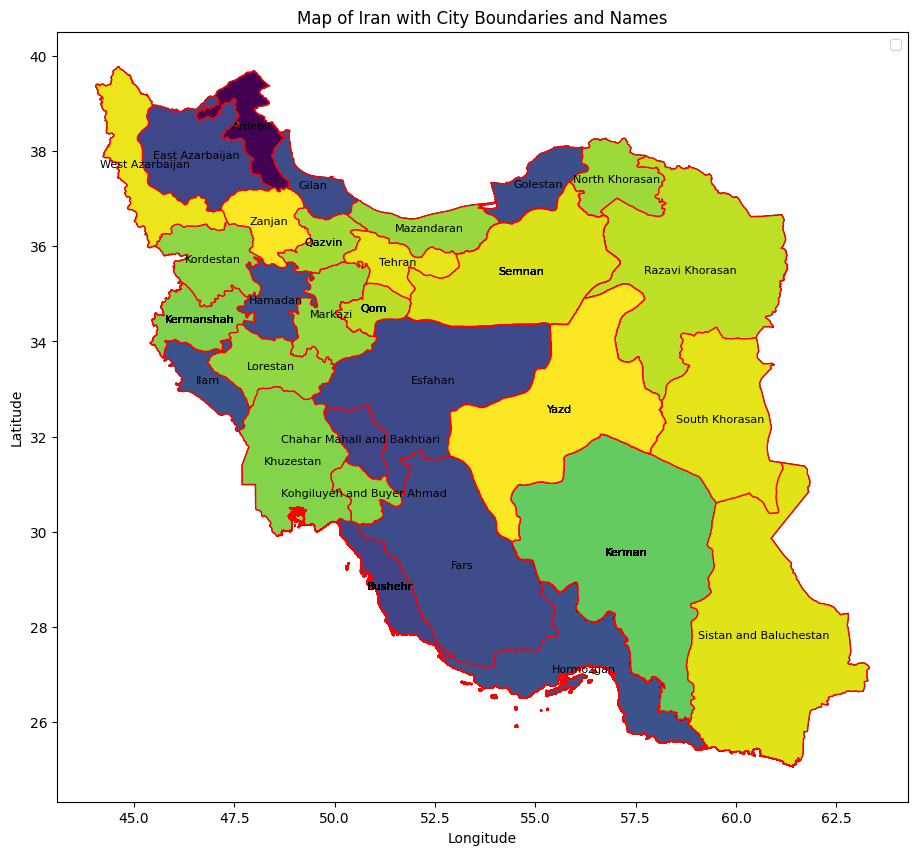

In [24]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load GeoJSON data
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/iran_geo.json"
iran_map = gpd.read_file(geojson_url)

# Extract city names from the 'place' column
fixkolom['city'] = fixkolom['place'].str.split(',').str[0].str.split('of').str[-1].str.strip()

# Merge the GeoJSON data with your DataFrame
merged_data = iran_map.merge(fixkolom, how='left', left_on='NAME_1', right_on='city')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Differentiate areas by color
iran_map.plot(ax=ax, color='white', edgecolor='black')
merged_data.plot(ax=ax, cmap='viridis', edgecolor='red', linewidth=1, legend=True)

# Add city names as legend
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['NAME_1']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Add labels and title
plt.title('Map of Iran with City Boundaries and Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the legend
plt.legend()

# Show the plot
plt.show()


<ipython-input-25-706d9372b0d6>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(data_values))


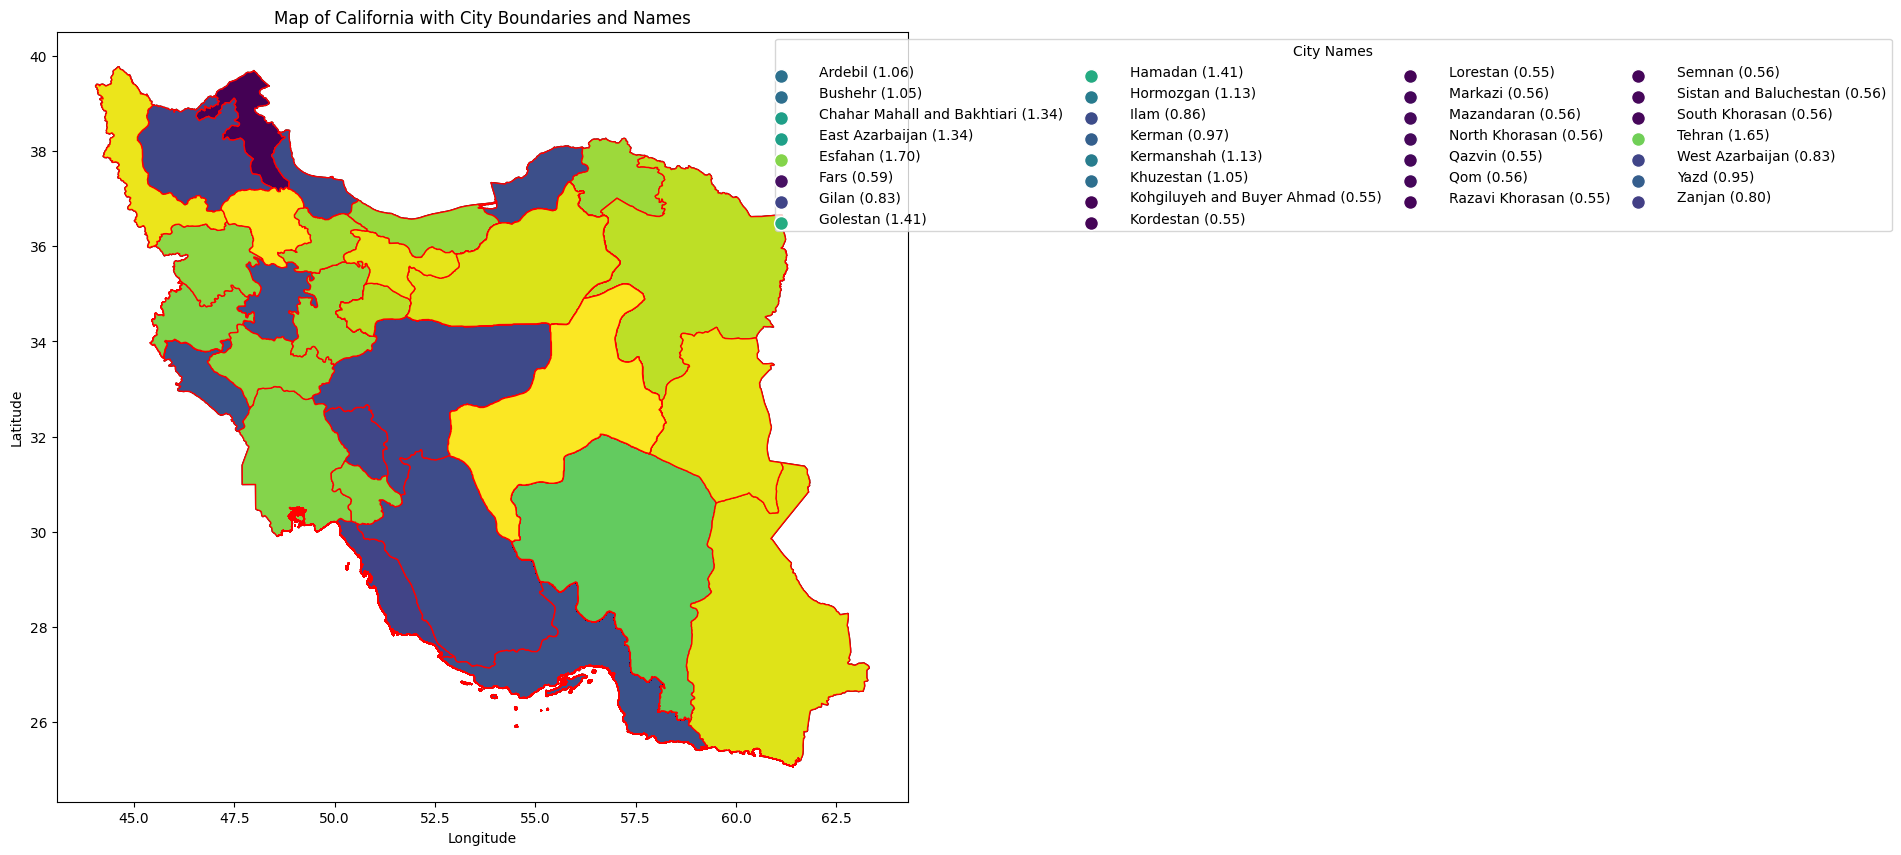

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerPatch
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load GeoJSON data
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/iran_geo.json"
iran_map = gpd.read_file(geojson_url)

# Extract city names from the 'place' column
fixkolom['city'] = fixkolom['place'].str.split(',').str[0].str.split('of').str[-1].str.strip()

# Merge the GeoJSON data with your DataFrame
merged_data = iran_map.merge(fixkolom, how='left', left_on='NAME_1', right_on='city')

# Handle NaN values in the 'b-value' column
merged_data['b-value'].fillna(merged_data['b-value'].mean(), inplace=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Differentiate areas by color
cmap = 'viridis'
iran_map.plot(ax=ax, color='white', edgecolor='black')
merged_data.plot(ax=ax, cmap=cmap, edgecolor='red', linewidth=1)

# Extract unique city names and their corresponding colors from the colormap
city_names = merged_data['NAME_1'].unique()

# Replace 'value' with the actual column name in your dataset
data_values = merged_data['b-value']  # Replace 'b-value' with your actual column name

# Normalize colormap to match data values
norm = Normalize(vmin=data_values.min(), vmax=data_values.max())
colors = plt.cm.get_cmap(cmap)(norm(data_values))

# Define a custom legend handler
class CityLegendHandler(HandlerPatch):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        marker_size = 10
        color = orig_handle.get_markerfacecolor()
        marker = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=marker_size)
        return [marker]

# Add city names and 'b-value' as custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10,
                          label=f'{name} ({value:.2f})')
                   for name, color, value in zip(city_names, colors, data_values)]

ax.legend(handles=legend_elements, title='City Names', handler_map={Line2D: CityLegendHandler()}, ncol=4, loc='upper center', bbox_to_anchor=(1.5, 1))

# Add labels and title
plt.title('Map of California with City Boundaries and Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()
